In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
class Model(nn.Module):

    def __init__(self,in_features=4,h1=8,h2=9,out_features=3):

        # how many layers?
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,out_features)

        # ip layer (4 features) -> h1 (x no of neurons N) -> h2 (x no of neurons N) -> op (3 classes / 3 species of flower)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return x

In [4]:
torch.manual_seed(32)
model = Model()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv('../Data/iris.csv')

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [8]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


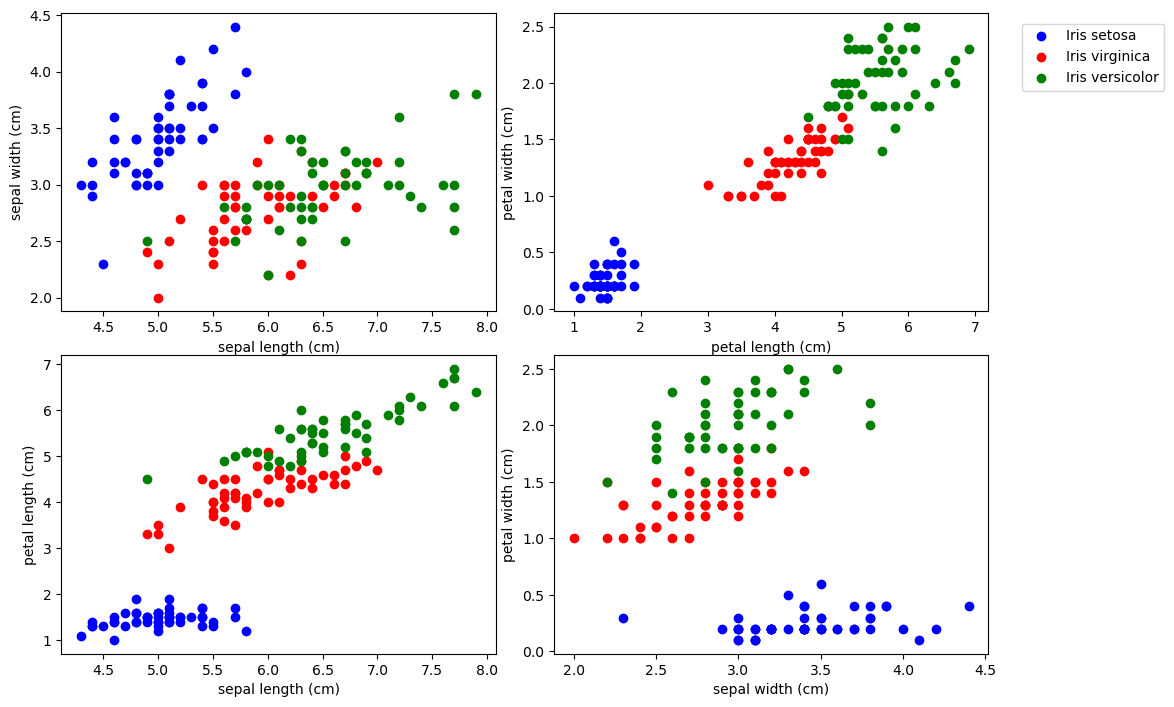

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [10]:
X = df.drop('target', axis=1)
y = df['target']

In [11]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: target, Length: 150, dtype: float64

In [13]:
type(X)

pandas.core.frame.DataFrame

In [14]:
type(y)

pandas.core.series.Series

In [15]:
X = X.values
y = y.values

In [16]:
type(X)

numpy.ndarray

In [17]:
type(y)

numpy.ndarray

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=33)

In [20]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [21]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [22]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [23]:
model.parameters()

<generator object Module.parameters at 0x7f72dbc3e5e0>

In [24]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [25]:
epochs = 100
losses = []

for i in range(epochs):

    # Forward and get a prediction

    y_pred = model.forward(X_train)

    # Calculate loss / error

    loss = criterion(y_pred, y_train)

    losses.append(loss)

    if i%10==0:
        print(f"Epoch {i} and loss is {loss}")

    # BACKPROPOGATION

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch 0 and loss is 1.1507114171981812
Epoch 10 and loss is 0.9377314448356628
Epoch 20 and loss is 0.7798256278038025
Epoch 30 and loss is 0.6099399924278259
Epoch 40 and loss is 0.40079930424690247
Epoch 50 and loss is 0.25436314940452576
Epoch 60 and loss is 0.15053051710128784
Epoch 70 and loss is 0.10086941719055176
Epoch 80 and loss is 0.08128312230110168
Epoch 90 and loss is 0.07231426984071732


Text(0.5, 0, 'Epoch')

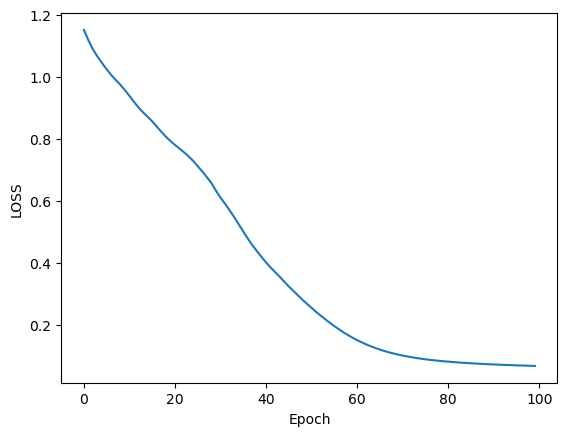

In [26]:
losses_detached = [loss.detach().numpy() for loss in losses]

plt.plot(range(epochs), losses_detached)
plt.ylabel('LOSS')
plt.xlabel('Epoch')

In [27]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)

In [28]:
loss

tensor(0.0581)

In [42]:
correct = 0

with torch.no_grad():

    for i,data in enumerate(X_test):

        y_val = model.forward(data)

        print(f"{i+1}.]      {str(y_val)}      {y_test[i]}")

        if y_val.argmax().item() == y_test[i]:
            correct += 1

print(f"We got {correct} correct!")

1.]      tensor([-2.1252,  4.8064, -0.8628])      1
2.]      tensor([-1.7985,  5.3098, -1.5449])      1
3.]      tensor([  6.3542,   0.8438, -10.0541])      0
4.]      tensor([-3.9123,  4.5958,  1.1693])      1
5.]      tensor([-7.4713,  3.2021,  5.7853])      2
6.]      tensor([-10.4976,   1.6459,   9.6297])      2
7.]      tensor([  6.3201,   0.9917, -10.1532])      0
8.]      tensor([  7.0468,   0.7059, -10.9137])      0
9.]      tensor([-7.2061,  3.3477,  5.3565])      2
10.]      tensor([-9.3960,  2.5759,  8.1033])      2
11.]      tensor([-9.8808,  2.3475,  8.7141])      2
12.]      tensor([ 6.2748,  0.6655, -9.7613])      0
13.]      tensor([-9.3142,  2.1880,  8.1947])      2
14.]      tensor([-3.7803,  4.5050,  1.0752])      1
15.]      tensor([-7.8657,  3.0117,  6.2303])      2
16.]      tensor([-1.8867,  5.1572, -1.3345])      1
17.]      tensor([-5.7006,  3.5030,  3.6696])      2
18.]      tensor([  7.1789,   0.7369, -11.1350])      0
19.]      tensor([-3.2944,  4.7931,  0.3

In [49]:
torch.save(model.state_dict(),'first_iris_model.pt')

In [50]:
new_model = Model()
new_model.load_state_dict(torch.load('first_iris_model.pt'))

<All keys matched successfully>

In [51]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [52]:
torch.save(model,'first_iris_model_full.pt')

In [53]:
mystery_iris = torch.tensor([5.6,3.7,2.2,0.5])

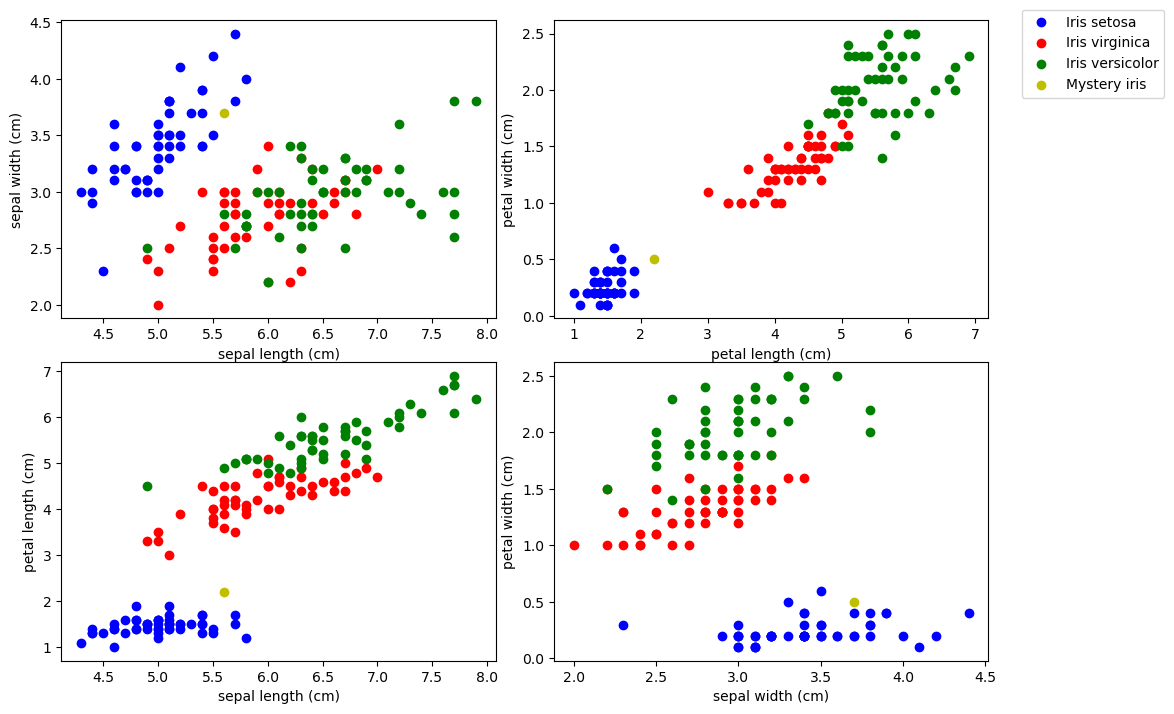

In [54]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor','Mystery iris']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

    # Add a plot for our mystery iris:
    ax.scatter(mystery_iris[plots[i][0]],mystery_iris[plots[i][1]], color='y')

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [55]:
with torch.no_grad():
    print(new_model(mystery_iris))
    print()
    print(labels[new_model(mystery_iris).argmax()])

tensor([  5.9522,   1.5596, -10.0054])

Iris setosa
